In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt

In [2]:
# Reading the input files
df = pd.read_csv("../../../../Data/Sequence CSVs/DENV1_DF.csv", header=None)
dss = pd.read_csv("../../../../Data/Sequence CSVs/DENV1_DSS.csv", header=None)
dhf = pd.read_csv("../../../../Data/Sequence CSVs/DENV1_DHF.csv", header=None)

# Printing the shape of the data
print("The shape of DF data is:", str(df.shape))
print("The shape of DSS data is:", str(dss.shape))
print("The shape of DHF data is:", str(dhf.shape))

The shape of DF data is: (584, 1)
The shape of DSS data is: (42, 1)
The shape of DHF data is: (352, 1)


In [3]:
# Making the disease label column
df_disease = np.repeat(0, 584)
dss_disease = np.repeat(1, 42)
dhf_disease = np.repeat(1, 352)

# Attaching the "Disease" labeled column to the input
df["Disease"] = df_disease
dss["Disease"] = dss_disease
dhf["Disease"] = dhf_disease

# Renaming the columns
df = df.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dss = dss.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dhf = dhf.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

# Concatinating the input data into one DataFrame and shuffling it
result = pd.concat([df, dss, dhf], axis = 0, sort = False)
result = result.sample(frac = 1)
print("The combined shape of the given data is:", str(result.shape))

# Taking a peek at the combined data
print(result.head())

The combined shape of the given data is: (978, 2)
                                              Sequence  Disease
382  atgaacaaccaacggaaaaagacgggtcgaccgtctttcaatatgc...        0
96   atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        1
225  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        1
73   atgaacaaccaacgaaaaaagacggctcgaccgtctttcaatatgc...        1
264  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        1


In [4]:
# function to convert sequence strings into k-mer words, default size = 7
def getKmers(sequence, size = 7):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

result['words'] = result.apply(lambda x: getKmers(x['Sequence']), axis=1)
result = result.drop('Sequence', axis=1)

result_texts = list(result['words'])
for item in range(len(result_texts)):
    result_texts[item] = ' '.join(result_texts[item])

The shape of y is: (978,)


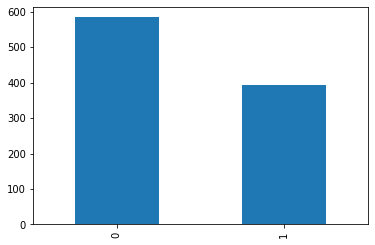

In [5]:
# Creating y and printing the shape of it
y = result.iloc[:, 0].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
result["Disease"].value_counts().sort_index().plot.bar()

In [6]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(result_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (978, 66006)


## Nested Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 20)
# empty list to store scores
k_scores = []

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
    print("The score for number of neighbours =", k, "is:", scores.mean())

The score for number of neighbours = 1 is: 0.6136832239925024
The score for number of neighbours = 2 is: 0.6106945746121003
The score for number of neighbours = 3 is: 0.6034780797667395
The score for number of neighbours = 4 is: 0.6218056857232115
The score for number of neighbours = 5 is: 0.6137665312923045
The score for number of neighbours = 6 is: 0.6135582630427991
The score for number of neighbours = 7 is: 0.6146308445277517
The score for number of neighbours = 8 is: 0.6166510465479538
The score for number of neighbours = 9 is: 0.6167551806727064
The score for number of neighbours = 10 is: 0.6155784650630012
The score for number of neighbours = 11 is: 0.6085910652920962
The score for number of neighbours = 12 is: 0.6084452775174425
The score for number of neighbours = 13 is: 0.6156409455378526
The score for number of neighbours = 14 is: 0.6103613454128917
The score for number of neighbours = 15 is: 0.6095178590023951
The score for number of neighbours = 16 is: 0.607456003332292
Th

Length of list 19
Max of list 0.6218056857232115


Text(0, 0.5, 'Cross-validated accuracy')

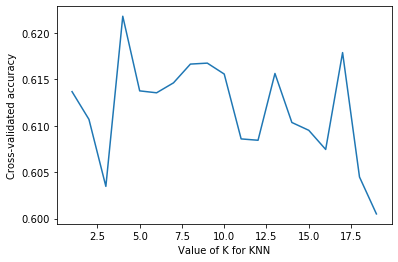

In [9]:
# in essence, this is basically running the k-fold cross-validation method 30 times because
# we want to run through K values from 1 to 30.
# we should have 21 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')